epoch: 0,  acc: 0.436,  loss: 1.099
epoch: 100,  acc: 0.545,  loss: 0.783
epoch: 200,  acc: 0.572,  loss: 0.757
epoch: 300,  acc: 0.642,  loss: 0.746
epoch: 400,  acc: 0.684,  loss: 0.772
epoch: 500,  acc: 0.741,  loss: 0.630
epoch: 600,  acc: 0.778,  loss: 0.534
epoch: 700,  acc: 0.812,  loss: 0.482
epoch: 800,  acc: 0.828,  loss: 0.457
epoch: 900,  acc: 0.844,  loss: 0.393
epoch: 1000,  acc: 0.859,  loss: 0.343
epoch: 1100,  acc: 0.897,  loss: 0.297
epoch: 1200,  acc: 0.902,  loss: 0.275
epoch: 1300,  acc: 0.904,  loss: 0.256
epoch: 1400,  acc: 0.912,  loss: 0.246
epoch: 1500,  acc: 0.918,  loss: 0.232
epoch: 1600,  acc: 0.920,  loss: 0.225
epoch: 1700,  acc: 0.923,  loss: 0.220
epoch: 1800,  acc: 0.925,  loss: 0.215
epoch: 1900,  acc: 0.926,  loss: 0.211
epoch: 2000,  acc: 0.927,  loss: 0.213
epoch: 2100,  acc: 0.929,  loss: 0.200
epoch: 2200,  acc: 0.929,  loss: 0.198
epoch: 2300,  acc: 0.930,  loss: 0.196
epoch: 2400,  acc: 0.930,  loss: 0.194
epoch: 2500,  acc: 0.936,  loss: 0.19

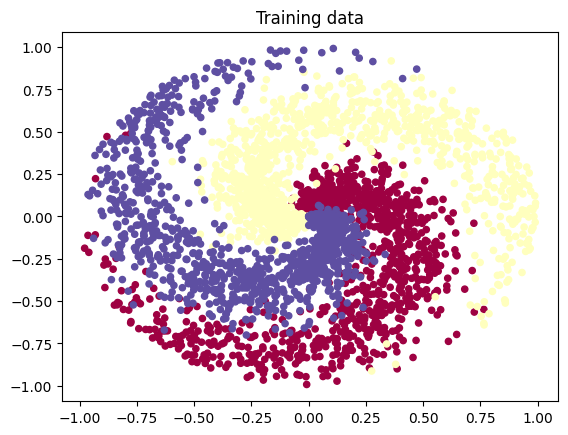

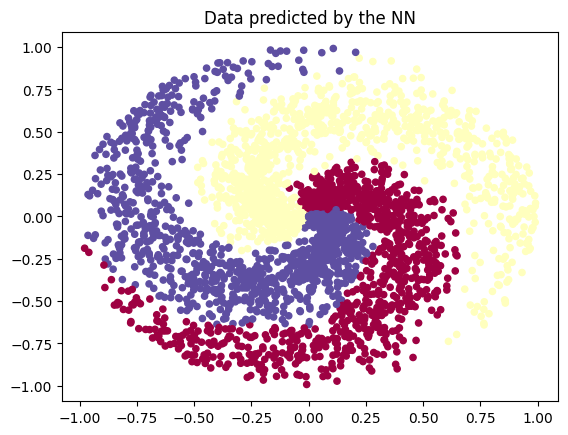

In [1]:
# Example of Training in loop: running for 10000 times

import numpy as np
import Activation as activation # type: ignore
import Dense as layer # type: ignore
import SGD as sgd_optimizer # type: ignore
#import SGD_LRDecay_Momentum as sgd_optimizer # type: ignore
import Points as point # type: ignore
import matplotlib.pyplot as plt

n_points = 1000
Training_Data = point.Spiral(n_points,3,2)

# Create the NN with 2 inputs, 1 layers (64 neurons) and 3 outputs:
Dense1 = layer.Dense(2,64) 
activation1 = activation.Activation_ReLU()
Dense2 = layer.Dense(64,3)
loss_activation = activation.Activation_Softmax_Loss_CategoricalCrossEntropy()
plt.show()

# Create the optimizer (to updates the NN's weights and biases)
optimizer = sgd_optimizer.Optimizer_SGD(0.8)
plt.show()

# Train in loop
for epoch in range(10001):
    # Perform a forward pass
    Dense1.forward(Training_Data.P)
    activation1.forward(Dense1.output)
    Dense2.forward(activation1.output)

    # Calculate loss & accuracy
    loss = loss_activation.forward(Dense2.output, Training_Data.L)

    predictions = np.argmax(loss_activation.output, axis = 1)
    if len(Training_Data.L.shape) == 2:
        Training_Data.L = np.argmax(Training_Data.L, axis=1)
    accuracy = np.mean(predictions == Training_Data.L)

    # print if epoch % 100 = 0
    if not epoch % 100:
        print(f'epoch: {epoch},  ' + 
              f'acc: {accuracy:.3f},  ' +
              f'loss: {loss:.3f}')
        
    # Back propagation
    loss_activation.backward(loss_activation.output,Training_Data.L)
    Dense2.backward(loss_activation.dinputs)
    activation1.backward(Dense2.dinputs)
    Dense1.backward(activation1.dinputs)

    # Update weights and biases using optimizer
    optimizer.update_params(Dense1)
    optimizer.update_params(Dense2)
    
# Final result of classification of data
print(predictions)   # Contain the information of classification of the NN
print(Training_Data.L)   # The training result vector


# Visualization of data (2D):
plt.figure(1)
plt.scatter(Training_Data.P[:, 0], Training_Data.P[:, 1], c=Training_Data.L, s=20, cmap=plt.cm.Spectral)
plt.title("Training data")

plt.figure(2)
plt.scatter(Training_Data.P[:, 0], Training_Data.P[:, 1], c=predictions, s=20, cmap=plt.cm.Spectral)
plt.title("Data predicted by the NN")
plt.show()

epoch: 0,  acc: 0.485,  loss: 1.099
epoch: 100,  acc: 0.531,  loss: 0.807
epoch: 200,  acc: 0.569,  loss: 0.776
epoch: 300,  acc: 0.607,  loss: 0.791
epoch: 400,  acc: 0.639,  loss: 0.781
epoch: 500,  acc: 0.694,  loss: 0.687
epoch: 600,  acc: 0.719,  loss: 0.622
epoch: 700,  acc: 0.761,  loss: 0.565
epoch: 800,  acc: 0.786,  loss: 0.564
epoch: 900,  acc: 0.727,  loss: 0.621
epoch: 1000,  acc: 0.752,  loss: 0.545
epoch: 1100,  acc: 0.755,  loss: 0.530
epoch: 1200,  acc: 0.848,  loss: 0.409
epoch: 1300,  acc: 0.793,  loss: 0.497
epoch: 1400,  acc: 0.847,  loss: 0.358
epoch: 1500,  acc: 0.840,  loss: 0.382
epoch: 1600,  acc: 0.881,  loss: 0.294
epoch: 1700,  acc: 0.891,  loss: 0.276
epoch: 1800,  acc: 0.896,  loss: 0.263
epoch: 1900,  acc: 0.904,  loss: 0.258
epoch: 2000,  acc: 0.928,  loss: 0.224
epoch: 2100,  acc: 0.916,  loss: 0.227
epoch: 2200,  acc: 0.916,  loss: 0.236
epoch: 2300,  acc: 0.928,  loss: 0.215
epoch: 2400,  acc: 0.891,  loss: 0.267
epoch: 2500,  acc: 0.922,  loss: 0.21

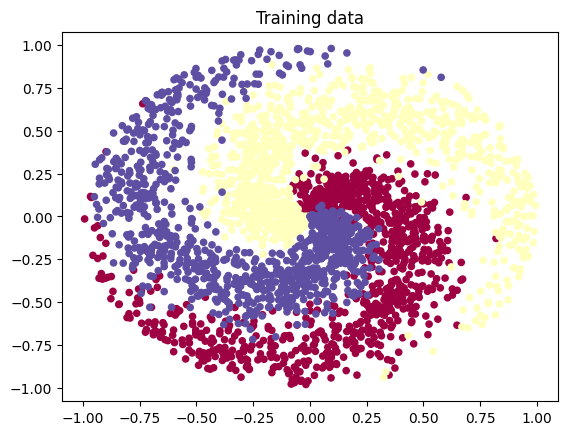

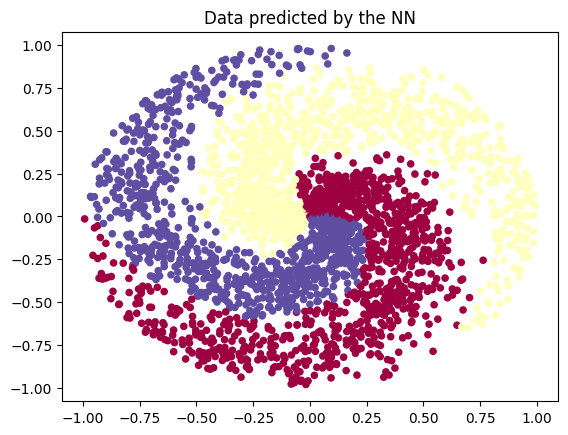

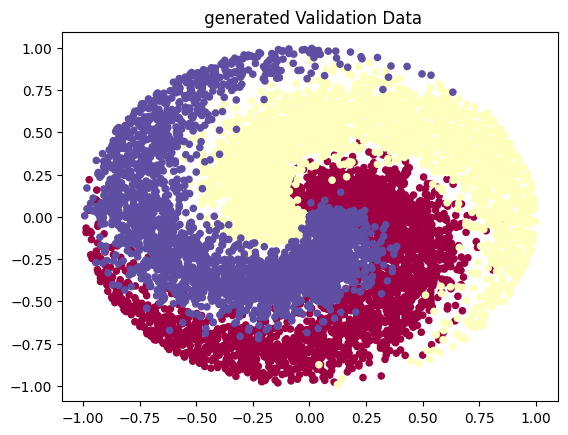

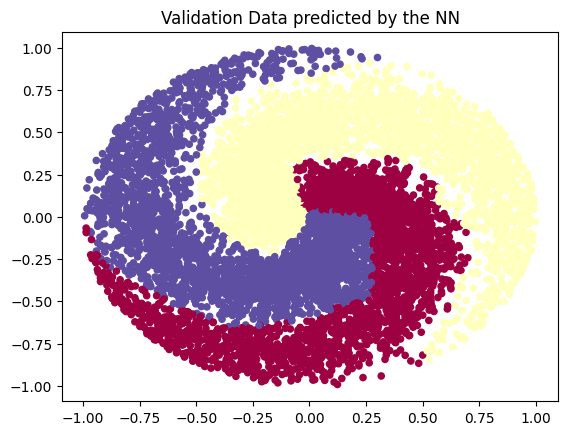

In [3]:
# Example of Training in loop: running for 10000 times

import numpy as np
import Activation as activation # type: ignore
import Dense as layer # type: ignore
import SGD as sgd_optimizer # type: ignore
#import SGD_LRDecay_Momentum as sgd_optimizer # type: ignore
import Points as point # type: ignore
import matplotlib.pyplot as plt

n_points = 1000
Training_Data = point.Spiral(n_points,3,2)

# Create the NN with 2 inputs, 1 layers (64 neurons) and 3 outputs:
Dense1 = layer.Dense(2,64) 
activation1 = activation.Activation_ReLU()
Dense2 = layer.Dense(64,3)
loss_activation = activation.Activation_Softmax_Loss_CategoricalCrossEntropy()
plt.show()

# Create the optimizer (to updates the NN's weights and biases)
optimizer = sgd_optimizer.Optimizer_SGD(0.8)
plt.show()

# Train in loop
for epoch in range(10001):
    # Perform a forward pass
    Dense1.forward(Training_Data.P)
    activation1.forward(Dense1.output)
    Dense2.forward(activation1.output)

    # Calculate loss & accuracy
    loss = loss_activation.forward(Dense2.output, Training_Data.L)

    predictions = np.argmax(loss_activation.output, axis = 1)
    if len(Training_Data.L.shape) == 2:
        Training_Data.L = np.argmax(Training_Data.L, axis=1)
    accuracy = np.mean(predictions == Training_Data.L)

    # print if epoch % 100 = 0
    if not epoch % 100:
        print(f'epoch: {epoch},  ' + 
              f'acc: {accuracy:.3f},  ' +
              f'loss: {loss:.3f}')
        
    # Back propagation
    loss_activation.backward(loss_activation.output,Training_Data.L)
    Dense2.backward(loss_activation.dinputs)
    activation1.backward(Dense2.dinputs)
    Dense1.backward(activation1.dinputs)

    # Update weights and biases using optimizer
    optimizer.update_params(Dense1)
    optimizer.update_params(Dense2)
    
# Final result of classification of data
print(predictions)   # Contain the information of classification of the NN
print(Training_Data.L)   # The training result vector


# Visualization of data (2D):
plt.figure(1)
plt.scatter(Training_Data.P[:, 0], Training_Data.P[:, 1], c=Training_Data.L, s=20, cmap=plt.cm.Spectral)
plt.title("Training data")

plt.figure(2)
plt.scatter(Training_Data.P[:, 0], Training_Data.P[:, 1], c=predictions, s=20, cmap=plt.cm.Spectral)
plt.title("Data predicted by the NN")
plt.show()

##############################################
# Test with new data
##############################################

n_test_points = 3000  # Change this number as you wish
Validation_Data = point.Spiral(n_test_points,3,2)

# Perform a forward pass
Dense1.forward(Validation_Data.P)
activation1.forward(Dense1.output)
Dense2.forward(activation1.output)

# Calculate loss & accuracy
loss = loss_activation.forward(Dense2.output, Validation_Data.L)

predictions = np.argmax(loss_activation.output, axis = 1)
if len(Validation_Data.L.shape) == 2:
    Validation_Data.L = np.argmax(Validation_Data.L, axis=1)
accuracy = np.mean(predictions == Validation_Data.L)

plt.figure(3)
plt.scatter(Validation_Data.P[:, 0], Validation_Data.P[:, 1], c=Validation_Data.L, s=20, cmap=plt.cm.Spectral)
plt.title(" generated Validation Data")

plt.figure(4)
plt.scatter(Validation_Data.P[:, 0], Validation_Data.P[:, 1], c=predictions, s=20, cmap=plt.cm.Spectral)
plt.title("Validation Data predicted by the NN")
plt.show()